In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv?raw=true'
df = pd.read_csv(url)

## Preparing the data

In [53]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

Next, use only the following columns:

- 'ram',
- 'storage',
- 'screen',
- 'final_price'

In [54]:
df_short = df [['ram', 'storage', 'screen', 'final_price']]

In [55]:
df_short.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


Look at the final_price variable. Does it have a long tail? Answer: LITTLE BIT.

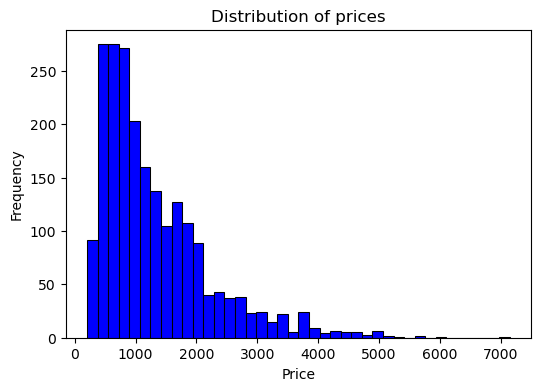

In [56]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price, bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

## Question 1
There's one column with missing values. What is it?

In [57]:
df_short.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

We notice that the column screen has missing values.

## Question 2
What's the median (50% percentile) for variable 'ram'?

In [58]:
print(f'The median for the variable ram is {df_short.ram.median()}')

The median for the variable ram is 16.0


## Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use the same code as in the lectures

In [59]:
# The code from the lectures is from here (as asked in the question):
# https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/02-carprice.ipynb

In [60]:
np.random.seed(42)

n = len(df_short)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_short.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [61]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


## Q 3: Regression without regularisation

We need to deal with missing values for the column from Q1.
We have two options: 
- fill it with 0 
- or with the mean of this variable.
Try both options. 

Steps: 
- For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

### Missing values replaced with zero

In [62]:
df_train_zero = df_train.copy()

In [63]:
df_train_zero.isnull().sum()

ram            0
storage        0
screen         3
final_price    0
dtype: int64

In [64]:
df_train_zero['screen'] = df_train_zero['screen'].fillna(0)

In [65]:
df_train_zero.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [66]:
df_train_zero.screen.mean()

15.128433641975306

In [67]:
df_val.isnull().sum()

ram            0
storage        0
screen         1
final_price    0
dtype: int64

In [68]:
df_test.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [69]:
df_val_zero = df_val.copy()

In [70]:
df_val_zero['screen'] = df_val_zero['screen'].fillna(0)

In [71]:
df_val_zero.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [72]:
df_test_zero=df_test.copy()

### Prepare Y

In [73]:
# df_train_zero 
# df_val_zero
# df_test_zero 

In [74]:
df_train_zero.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [75]:
y_train_zero = df_train_zero.final_price.values
y_val_zero = df_val_zero.final_price.values
y_test_zero = df_test_zero.final_price.values


del df_train_zero['final_price']
del df_val_zero['final_price']
del df_test_zero['final_price']

In [76]:
y_train_zero

array([1123.29,  201.05,  997.74, ..., 1059.  , 1671.  , 1056.  ])

### Prepare X

In [77]:
base = ['ram', 'storage', 'screen']

In [78]:
def prepare_X(df):
    df_num = df[base]
    X = df_num.values
    return X

In [79]:
X_zero = prepare_X(df_train_zero)

In [80]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [81]:
X_train_zero = prepare_X(df_train_zero)
w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train_zero)

In [82]:
print(w_0_zero)
print(w_zero)

676.8954853003471
[ 43.70681555   0.86506867 -36.10399833]


### Test on the validation dataset

In [83]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error **2).mean()
    return np.sqrt(mse)

In [84]:
X_val_zero = prepare_X(df_val_zero)
y_pred_zero = w_0_zero + X_val_zero.dot(w_zero)

In [85]:
rmse(y_val_zero, y_pred_zero)

597.3635593619621

### Missing values replaced with mean

In [86]:
df_train_mean = df_train.copy()

In [87]:
df_train_mean.isnull().sum()

ram            0
storage        0
screen         3
final_price    0
dtype: int64

In [88]:
df_train_mean['screen'] = df_train_mean['screen'].fillna(df_train_mean['screen'].mean())

In [89]:
df_train_mean.isnull().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [90]:
df_train_mean.screen.mean()

15.16353441608662

In [91]:
df_val_mean = df_val.copy()

In [92]:
df_val_mean['screen'] = df_val_mean['screen'].fillna(df_val_mean['screen'].mean())

In [93]:
df_test_mean = df_test.copy()

In [94]:
y_train_mean = df_train_mean.final_price.values
y_val_mean = df_val_mean.final_price.values
y_test_mean = df_test_mean.final_price.values

del df_train_mean['final_price']
del df_val_mean['final_price']
del df_test_mean['final_price']

In [95]:
X_train_mean = prepare_X(df_train_mean)
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train_mean)

In [96]:
print(w_0_mean)
print(w_mean)

808.9159907333383
[ 43.90774584   0.87135236 -45.18273312]


In [97]:
X_val_mean = prepare_X(df_val_mean)
print(X_val_mean.shape)
y_pred_mean = w_0_mean + X_val_mean.dot(w_mean)
print('validation rmse for using the mean:', rmse(y_val_mean, y_pred_mean))

(432, 3)
validation rmse for using the mean: 600.2619483181326


In [98]:
print(f'validation rmse zero: {round(rmse(y_val_zero, y_pred_zero),2)}')
print(f'validation rmse for using the mean: {round(rmse(y_val_mean, y_pred_mean),2)}')



validation rmse zero: 597.36
validation rmse for using the mean: 600.26


**Answer:** Rounded a two decimals we see that the RMSE is the lowest when the zero values are used

## 4. Regularized linear regression
Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [99]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [100]:
for r in [0, 0.1, 1, 10, 100]:
    w_0_reg, w_reg = train_linear_regression_reg(X_train_zero, y_train_zero, r=r)
    y_pred_zero = w_0_reg + X_val_zero.dot(w_reg)
    print(f'validation rmse zero with {r}:, {rmse(y_val_zero, y_pred_zero)}')

validation rmse zero with 0:, 597.3635593619621
validation rmse zero with 0.1:, 597.3451592963619
validation rmse zero with 1:, 597.2121215589522
validation rmse zero with 10:, 597.0587680661118
validation rmse zero with 100:, 597.9032640603045


Answer: We see that the lowest RMSE is obtained when we have r equal to 0.1

## 5. We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [104]:
rmse_list = []

for seed_value in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    np.random.seed(seed_value)

    n = len(df_short)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_short.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()


    df_train_zero = df_train.copy()
    df_val_zero = df_val.copy()
    df_test_zero = df_test.copy()

    df_train_zero['screen'] = df_train_zero['screen'].fillna(0)
    df_val_zero['screen'] = df_val_zero['screen'].fillna(0)
    
    y_train_zero = df_train_zero.final_price.values
    y_val_zero = df_val_zero.final_price.values
    y_test_zero = df_test_zero.final_price.values


    del df_train_zero['final_price']
    del df_val_zero['final_price']
    del df_test_zero['final_price']

    base = ['ram', 'storage', 'screen']

    X_zero = prepare_X(df_train_zero)

    X_train_zero = prepare_X(df_train_zero)
    w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train_zero)

    # print(w_0_zero)
    # print(w_zero)

    X_val_zero = prepare_X(df_val_zero)
    y_pred_zero = w_0_zero + X_val_zero.dot(w_zero)

    error = y_pred_zero - y_val_zero
    mse = (error **2).mean()
    rmse = np.sqrt(mse)
    print(rmse)
    rmse_list.append(rmse)

565.4520868770995
636.7985423056726
588.955869790796
597.8148920012515
571.962791511103
573.238325661895
647.3438328407194
550.4398184485962
587.3335036169963
576.101792943313


In [105]:
rmse_list

[565.4520868770995,
 636.7985423056726,
 588.955869790796,
 597.8148920012515,
 571.962791511103,
 573.238325661895,
 647.3438328407194,
 550.4398184485962,
 587.3335036169963,
 576.101792943313]

In [114]:
stdev = np.std(np.array(rmse_list))
print(f'The standard deviation for using different seeds is {round(stdev,3)}')

The standard deviation for using different seeds is 29.176


## Question 6:
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?